# Overview

This notebook will accomplish understanding of the relationship between predictors and predictant of the data set. Data visualization and statistical tests were used to gain insights regarding feature importance and feature engineering stategies. New features were engineerd in `data_prepartion.ipynb` for modeling. 

## Methods

1. Understand statistical signifcance of features
2. Create Visualization to convery statistical significance
3. Perform statistical tests to understand feature significance

## Summary

The data was skewed towards patients with age greater 50 and with patients with inpatient length of days less than 5 days. Number of diagonses were heavily skewed at 9 diagnoses. All three factors were directly proportional to the readmission possibilties. Number of medication, number of inpatient visits and number of outpatient visits were statistically significant indicator of readmission possbilities. Number of procedures and number of lab procedures were statistically significant indicator separating no readmission and readmission, but was not significant for timing of the readmission. 

## Library Import

In [2]:
import pandas as pd
pd.set_option("display.max_columns", 300)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stat

%matplotlib inline

## Import Data

In [4]:
# pre-cleaned data
clean_df = pd.read_csv(r"..\data\diabetic_data_preclean.csv", index_col=0)

In [5]:
clean_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,2
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,Ch,Yes,0


## T-test on Select Features

alpha = 0.5 <br>

Selected Features = Number of Medication, Procedure, and Lab Procedures <Br>

Null Hypothesis: Selected Features are not significant factors determining readmission. <br>
Alternative Hypothesis: Selected Features are significant factors determining readmission. <br>

In [4]:
features = ["num_medications", "num_procedures", "num_lab_procedures", "number_outpatient", "number_inpatient"]
alpha = 0.05

for feature in features:
    #slice data
    readmit_0 = clean_df[clean_df.readmitted == 0][feature]
    readmit_1 = clean_df[clean_df.readmitted == 1][feature]
    readmit_2 = clean_df[clean_df.readmitted == 2][feature]
    
    #series of t-test
    num_med_0_1 = stat.ttest_ind(readmit_0, readmit_1, equal_var = False)[1]
    num_med_1_2 = stat.ttest_ind(readmit_1, readmit_2, equal_var = False)[1]
    num_med_0_2 = stat.ttest_ind(readmit_0, readmit_2, equal_var = False)[1]
    
    if num_med_0_1 <= alpha:
        print(f"{feature} T-test for readmission 0 vs 1 P-value: ", num_med_0_1)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 0 vs 1 P-value: ", num_med_0_1)
        print("FAILURE to Reject Null Hypothesis", "\n")
    if num_med_1_2 <= alpha:
        print(f"{feature} T-test for readmission 1 vs 2 P-value: ", num_med_1_2)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 1 vs 2 P-value: ", num_med_1_2)
        print("FAILURE to Reject Null Hypothesis", "\n")
    if num_med_0_2 <= alpha:
        print(f"{feature} T-test for readmission 0 vs 2 P-value: ", num_med_0_2)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 0 vs 2 P-value: ", num_med_0_2)
        print("FAILURE to Reject Null Hypothesis", "\n")

num_medications T-test for readmission 0 vs 1 P-value:  2.149293623995029e-48
Reject Null Hypothesis 

num_medications T-test for readmission 1 vs 2 P-value:  5.853119998295598e-13
Reject Null Hypothesis 

num_medications T-test for readmission 0 vs 2 P-value:  1.1152690198545309e-29
Reject Null Hypothesis 

num_procedures T-test for readmission 0 vs 1 P-value:  3.495894289451428e-14
Reject Null Hypothesis 

num_procedures T-test for readmission 1 vs 2 P-value:  0.07753339914164716
FAILURE to Reject Null Hypothesis 

num_procedures T-test for readmission 0 vs 2 P-value:  7.285489746058182e-44
Reject Null Hypothesis 

num_lab_procedures T-test for readmission 0 vs 1 P-value:  2.859491382144581e-20
Reject Null Hypothesis 

num_lab_procedures T-test for readmission 1 vs 2 P-value:  0.06186164189328136
FAILURE to Reject Null Hypothesis 

num_lab_procedures T-test for readmission 0 vs 2 P-value:  1.7302681119088142e-27
Reject Null Hypothesis 

number_outpatient T-test for readmission 0 vs 1

#### T-test Results

- Null hypothesis can be rejected for number of medications, statistical significance were found between number of medication in determining readmission status

- Failed to reject null hypothesis on statistical significance of number of procedures determining readmission within or after 30 days. 

- Failed to reject null hypothesis on statistical significance of number of lab procedures determining readmission within or after 30 days. 

- Number of inpatient T-test displaying p-values of 0 demonstrated very large frequency imbalance between the three groups. 

## Violin Plot of significant features

Number of medication, number of inpatient visits, and number of outpatient visits were all significant factors in determining readmission possibility for all outcomes. 

### Number of Medications

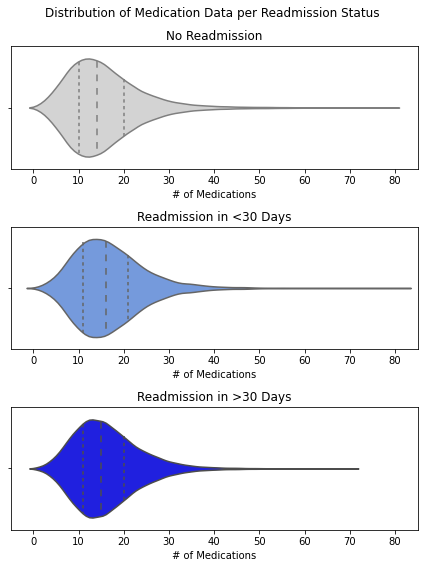

In [6]:
#set color?
sns.set_palette("rocket")
#data slice
x0 = clean_df[clean_df.readmitted == 0]["num_medications"]
x1 = clean_df[clean_df.readmitted == 1]["num_medications"]
x2 = clean_df[clean_df.readmitted == 2]["num_medications"]

#set subplots
fig, ax = plt.subplots(3,1, figsize=(6,8))
#subplot 1
sns.violinplot(x0, color="lightgrey", ax=ax[0], inner="quartile")
ax[0].set_title("No Readmission")
ax[0].set_xlim(-5,85)
ax[0].set_xlabel("# of Medications")

#subplot 2
sns.violinplot(x1, color="cornflowerblue", ax=ax[1], inner="quartile")
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-5,85)
ax[1].set_xlabel("# of Medications")

#subplot 3
sns.violinplot(x2, color="blue", ax=ax[2], inner="quartile")
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-5,85)
ax[2].set_xlabel("# of Medications")

#prettify
plt.suptitle("Distribution of Medication Data per Readmission Status")
plt.tight_layout(); #make it neat

plt.show();

Number of medications have small data spared difference when divided by readmission status. First, the readmission within <30 days had highest spread in number of medication. Second, the mean medication among this group was higher than mean of other readmission status. This can be interpreted as high risk (more likely to return) patients are assigned more medicaiton to support them. 

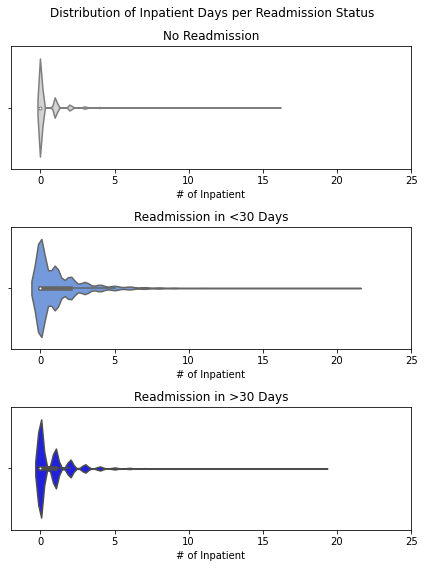

In [7]:
# data slice
x0 = clean_df[clean_df.readmitted == 0]["number_inpatient"]
x1 = clean_df[clean_df.readmitted == 1]["number_inpatient"]
x2 = clean_df[clean_df.readmitted == 2]["number_inpatient"]

# plot
fig, ax = plt.subplots(3,1, figsize=(6,8))
# subplot 1
sns.violinplot(x0, color="lightgrey", alpha=0.7, ax=ax[0])
ax[0].set_title("No Readmission")
ax[0].set_xlim(-2, 25)
ax[0].set_xlabel("# of Inpatient")

# subplot 2
sns.violinplot(x1, color="cornflowerblue", alpha=0.7, ax=ax[1])
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-2, 25)
ax[1].set_xlabel("# of Inpatient")

# subplot 3
sns.violinplot(x2, color="blue", alpha=0.7, ax=ax[2])
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-2, 25)
ax[2].set_xlabel("# of Inpatient")

# prettify
plt.suptitle("Distribution of Inpatient Days per Readmission Status")
plt.tight_layout(); #make it neat

plt.show();

Number of inpatient days demonstrated significant data spread when separated by readmission status. Readmission within 30 days shows higher frequency and spared of number of inpatient days. Most patients with no readmission had 0 inpatient visits. 

## Stacked Bar Plots

### Age

Age Summary


readmitted      0     1     2
age                          
[0-10)        132     3    26
[10-20)       427    40   224
[20-30)       911   236   510
[30-40)      2164   424  1187
[40-50)      5380  1027  3278
[50-60)      9671  1668  5917
[60-70)     12083  2502  7897
[70-80)     13522  3069  9475
[80-90)      8896  2078  6223
[90-100)     1675   310   808


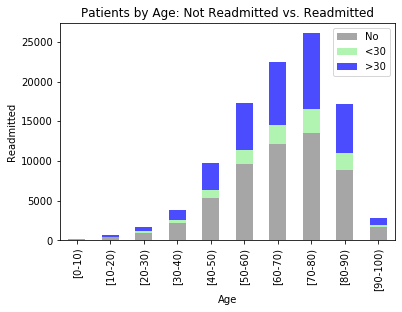

In [7]:
# Age summary
print('Age Summary')

print('\n')
print(clean_df.groupby(['age','readmitted']).age.count().unstack())

# Age class visualization
ageclass = clean_df.groupby(['age','readmitted']).age.count().unstack()
p1 = ageclass.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Age: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Age')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Age_Readmiited.png')
plt.show()

As we can see in the graph above, there is a skew towards ages greater than 50 years old.

### Probability of Readmittance by Age

Probability of Readmittance by Age Summary


readmitted         0         1         2
age                                     
[0-10)      0.819876  0.018634  0.161491
[10-20)     0.617945  0.057887  0.324168
[20-30)     0.549789  0.142426  0.307785
[30-40)     0.573245  0.112318  0.314437
[40-50)     0.555498  0.106040  0.338462
[50-60)     0.560443  0.096662  0.342895
[60-70)     0.537452  0.111289  0.351259
[70-80)     0.518760  0.117740  0.363500
[80-90)     0.517300  0.120835  0.361865
[90-100)    0.599714  0.110992  0.289295


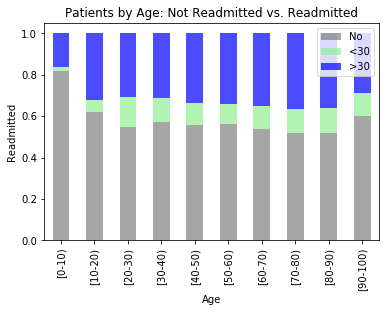

In [8]:
ppa = clean_df.groupby(['age','readmitted']).age.count().unstack()
spa = clean_df.groupby(['age','readmitted']).age.count().unstack()
tpa = clean_df.groupby(['readmitted', 'age']).readmitted.count().unstack().sum()
for x in range(0, 3):
    ppa[x] = spa[x] / tpa

print('Probability of Readmittance by Age Summary')
print('\n')
print(ppa)

# Probability of Readmittance by Age visualization
p1 = ppa.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Age: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Age')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Percentage_Age_Readmitted.png')
plt.show()

From the graph above, we can see that for the most part, as age increases, the probability of readmittance increases. The probability of readmittance after 30 days greater then before 30 days.

### Length of Hospital Stay

Hospital Stay Summary


readmitted           0     1     2
time_in_hospital                  
1                 8573  1162  4471
2                 9593  1712  5919
3                 9777  1894  6085
4                 7216  1644  5064
5                 5181  1199  3586
6                 3835   949  2755
7                 2984   752  2123
8                 2176   625  1589
9                 1491   412  1099
10                1168   336   838
11                 961   195   699
12                 737   193   518
13                 640   149   421
14                 529   135   378


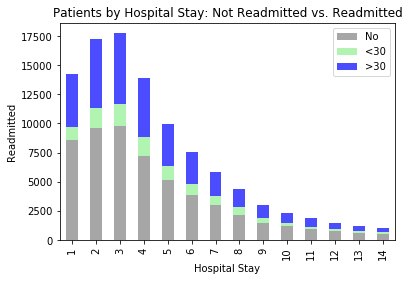

In [9]:
# Hospital Stay class summary
print('Hospital Stay Summary')

print('\n')
print(clean_df.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack())

# Hospital Stay visualization
hospital_stay = clean_df.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack()
p1 = hospital_stay.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Hospital Stay: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Hospital Stay')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Hospital_Stay_Readmitted.png')
plt.show()

There is a skew in the frequency of hospital stay lengths towards stays less than 5 days.

### Probability of Readmittance by Length of Hospital Stay

Probability of Readmittance by Length of Hospital Stay Summary


readmitted               0         1         2
time_in_hospital                              
1                 0.603477  0.081796  0.314726
2                 0.556955  0.099396  0.343648
3                 0.550631  0.106668  0.342701
4                 0.518242  0.118070  0.363689
5                 0.519868  0.120309  0.359823
6                 0.508688  0.125879  0.365433
7                 0.509302  0.128350  0.362349
8                 0.495672  0.142369  0.361959
9                 0.496669  0.137242  0.366089
10                0.498719  0.143467  0.357814
11                0.518059  0.105121  0.376819
12                0.508978  0.133287  0.357735
13                0.528926  0.123140  0.347934
14                0.507678  0.129559  0.362764


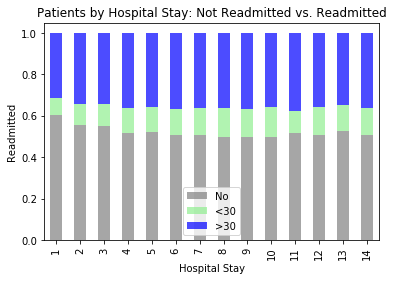

In [11]:
pph = clean_df.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack()
sph = clean_df.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack()
tph = clean_df.groupby(['readmitted', 'time_in_hospital']).readmitted.count().unstack().sum()
for x in range(0, 3):
    pph[x] = sph[x] / tph

print('Probability of Readmittance by Length of Hospital Stay Summary')
print('\n')
print(pph)

# Probability of Readmittance by Length of Hospital Stay Visualization
p1 = pph.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Hospital Stay: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Hospital Stay')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Percentage_Hospital_Stay_Readmitted.png')
plt.show()

Number of Diagnoses Summary


readmitted            0     1      2
number_diagnoses                    
1                   167    13     39
2                   687    62    274
3                  1863   209    763
4                  3473   457   1606
5                  7353  1043   2996
6                  5706  1058   3397
7                  5542  1119   3732
8                  5564  1254   3798
9                 24447  6125  18901
10                    9     3      5
11                    3     3      5
12                    5     1      3
13                    7     3      6
14                    3     1      3
15                    5     2      3
16                   27     4     14


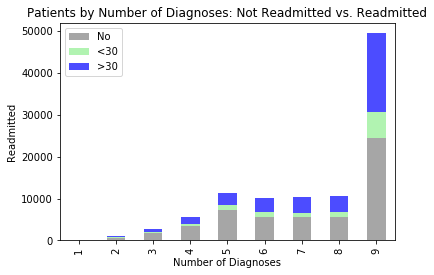

In [12]:
# diagnosis summary
print('Number of Diagnoses Summary')

print('\n')
print(clean_df.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack())

# gender visualization
nodclass = clean_df.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack()
p1 = nodclass.iloc[0:9, :].plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Number of Diagnoses: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Number of Diagnoses')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/NoD_Readmitted.png')
plt.show()

Due to the lack of data for patients with diagnoses greater than 9, the graph only shows the first 9 bars. Patients with 9 diagnoses are most frequent in the dataset. 

### Probability of Readmittance by Number of Diagnoses

Probability of Readmittance by Number of Diagnoses Summary


readmitted               0         1         2
number_diagnoses                              
1                 0.762557  0.059361  0.178082
2                 0.671554  0.060606  0.267840
3                 0.657143  0.073721  0.269136
4                 0.627348  0.082551  0.290101
5                 0.645453  0.091555  0.262992
6                 0.561559  0.104124  0.334317
7                 0.533244  0.107669  0.359088
8                 0.524115  0.118124  0.357762
9                 0.494148  0.123805  0.382047
10                0.529412  0.176471  0.294118
11                0.272727  0.272727  0.454545
12                0.555556  0.111111  0.333333
13                0.437500  0.187500  0.375000
14                0.428571  0.142857  0.428571
15                0.500000  0.200000  0.300000
16                0.600000  0.088889  0.311111


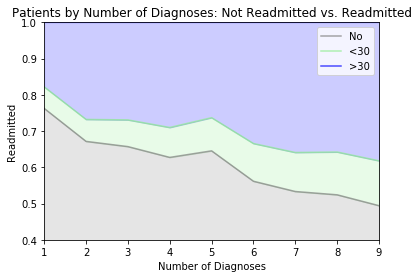

In [13]:
ppnd = clean_df.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack()
spnd = clean_df.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack()
tpnd = clean_df.groupby(['readmitted', 'number_diagnoses']).readmitted.count().unstack().sum()
for x in range(0, 3):
    ppnd[x] = spnd[x] / tpnd

print('Probability of Readmittance by Number of Diagnoses Summary')
print('\n')
print(ppnd)

# Probability of Readmittance by Number of Diagnoses Visualization
# ignoring values greater than 9, due to insignificant amount of data
p1 = ppnd.iloc[0:9, :].plot(kind = 'line', stacked = True, 
                   title = 'Patients by Number of Diagnoses: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Number of Diagnoses')
p1.set_ylabel('Readmitted')
plt.fill_between(ppnd.iloc[0:9, :].index, ppnd.iloc[0:9, :][0], color = 'gray', alpha = 0.2) # fill in between the lines with color of readmittance
plt.fill_between(ppnd.iloc[0:9, :].index, ppnd.iloc[0:9, :][0] + ppnd.iloc[0:9, :][1], ppnd.iloc[0:9, :][0], color = 'lightgreen', alpha = 0.2)
plt.fill_between(ppnd.iloc[0:9, :].index, 1 - ppnd.iloc[0:9, :][2], 1, color = 'blue', alpha = 0.2)
p1.set_ylim(0.4, 1) # Taking a closer look at change in percentage by only looking above 40%
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Percentage_NoD_Readmitted.png')
plt.show()

The probability of being readmitted generally increases as the number of diagnoses increases.